In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import PIL
%matplotlib inline

In [2]:
def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off') #hide the axis
    ax[1].axis('off')
    f.tight_layout()
    plt.show()


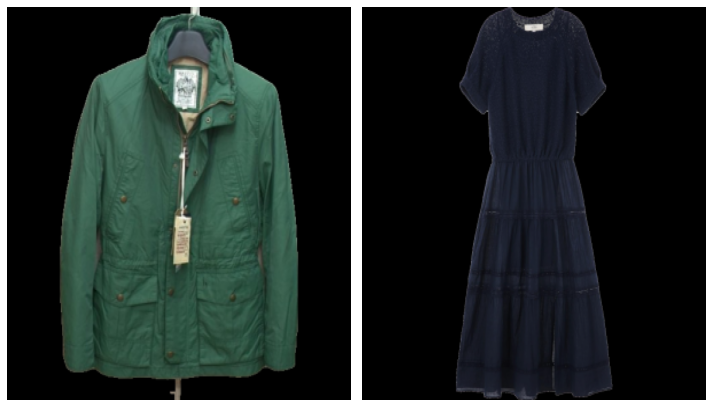

In [7]:
img = cv.imread("/content/d (1).png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_2 = cv.imread("/content/d (4).png")
img_2 = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)
 
dim = (700, 800)
# resize image
img = cv.resize(img, dim, interpolation = cv.INTER_AREA)
img_2 = cv.resize(img_2, dim, interpolation = cv.INTER_AREA)
 
show_img_compar(img, img_2)


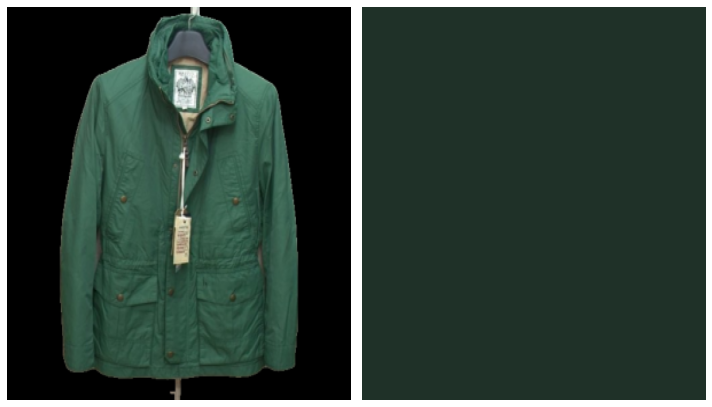

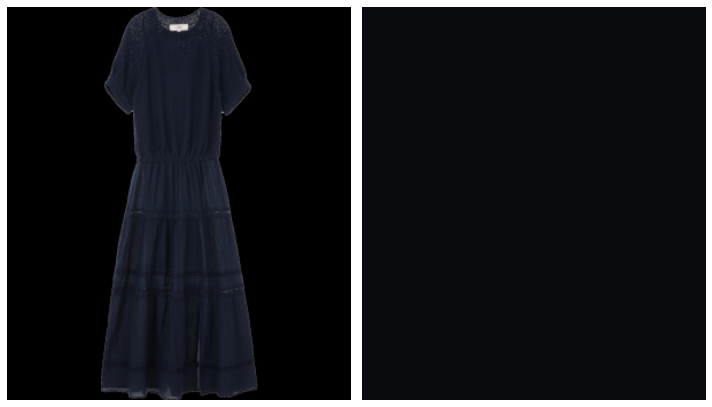

In [8]:
img_temp = img.copy()
img_temp[:,:,0], img_temp[:,:,1], img_temp[:,:,2] = np.average(img, axis=(0,1))
 
img_temp_2 = img_2.copy()
img_temp_2[:,:,0], img_temp_2[:,:,1], img_temp_2[:,:,2] = np.average(img_2, axis=(0,1))
 
show_img_compar(img, img_temp)
show_img_compar(img_2, img_temp_2)


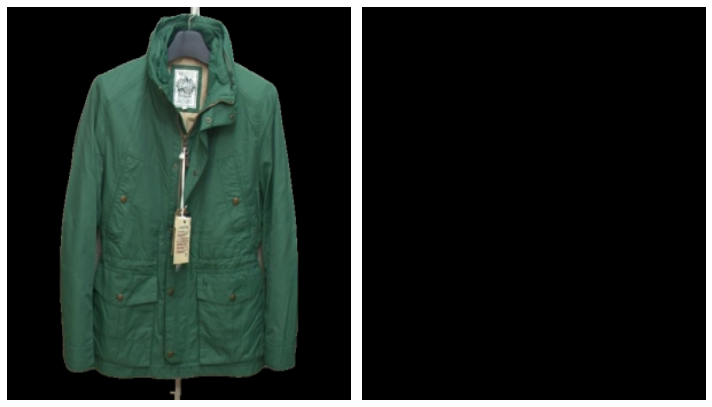

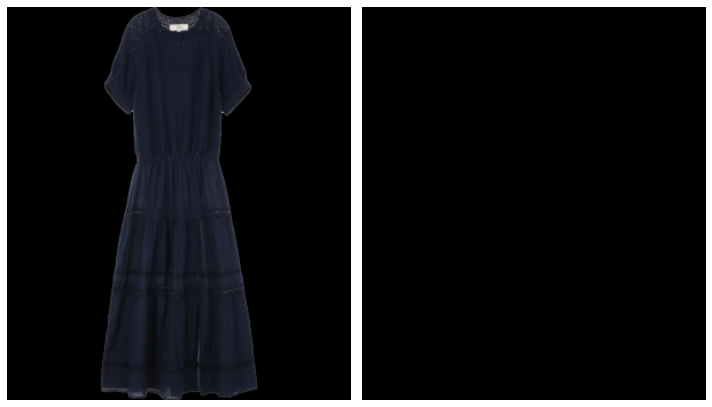

In [9]:
img_temp = img.copy()
unique, counts = np.unique(img_temp.reshape(-1, 3), axis=0, return_counts=True)
img_temp[:,:,0], img_temp[:,:,1], img_temp[:,:,2] = unique[np.argmax(counts)]
 
img_temp_2 = img_2.copy()
unique, counts = np.unique(img_temp_2.reshape(-1, 3), axis=0, return_counts=True)
img_temp_2[:,:,0], img_temp_2[:,:,1], img_temp_2[:,:,2] = unique[np.argmax(counts)]
 
show_img_compar(img, img_temp)
show_img_compar(img_2, img_temp_2)


In [11]:
from sklearn.cluster import KMeans

In [13]:
clt = KMeans(n_clusters=5)
clt.fit(img.reshape(-1,3))

KMeans(n_clusters=5)

In [14]:
clt.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [15]:
clt.cluster_centers_

array([[4.09149584e+01, 7.10553589e+01, 5.59265296e+01],
       [1.58888035e-01, 2.21114514e-01, 1.75941412e-01],
       [1.95633296e+02, 1.97621797e+02, 1.81758530e+02],
       [5.72950598e+01, 9.42646863e+01, 7.73109745e+01],
       [8.41806661e+01, 1.20274767e+02, 1.03950099e+02]])

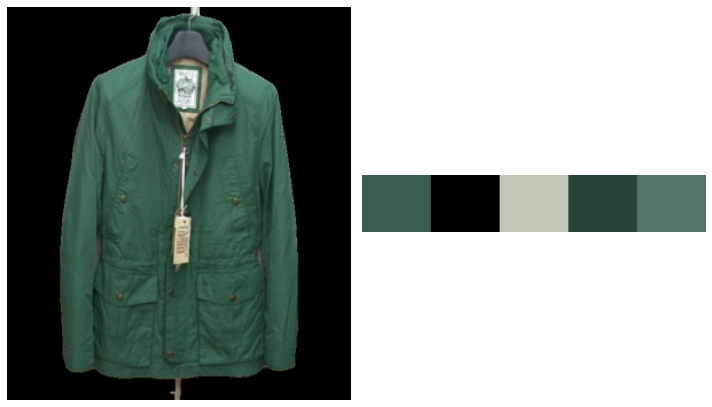

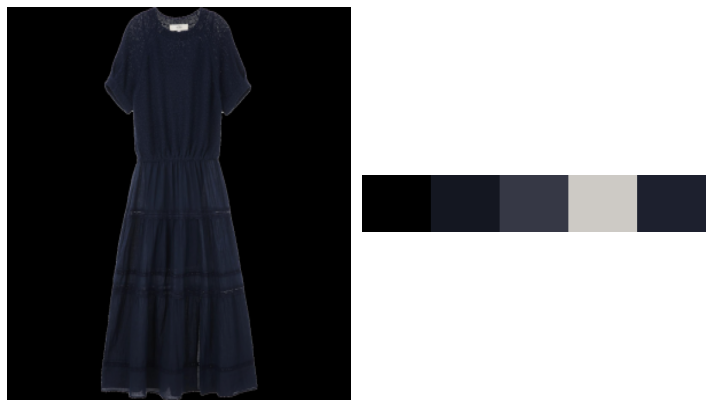

In [16]:
def palette(clusters):
    width=300
    palette = np.zeros((50, width, 3), np.uint8)
    steps = width/clusters.cluster_centers_.shape[0]
    for idx, centers in enumerate(clusters.cluster_centers_): 
        palette[:, int(idx*steps):(int((idx+1)*steps)), :] = centers
    return palette
 
  
clt_1 = clt.fit(img.reshape(-1, 3))
show_img_compar(img, palette(clt_1))
 
clt_2 = clt.fit(img_2.reshape(-1, 3))
show_img_compar(img_2, palette(clt_2))


{0: 0.27, 1: 0.46, 2: 0.01, 3: 0.18, 4: 0.07}
[[5.63051101e+01 9.30862211e+01 7.61442746e+01]
 [1.51889588e-01 2.10368104e-01 1.67742733e-01]
 [1.94830240e+02 1.96909281e+02 1.80975538e+02]
 [4.03084967e+01 7.00820016e+01 5.50748757e+01]
 [8.16230125e+01 1.18131658e+02 1.01757932e+02]]


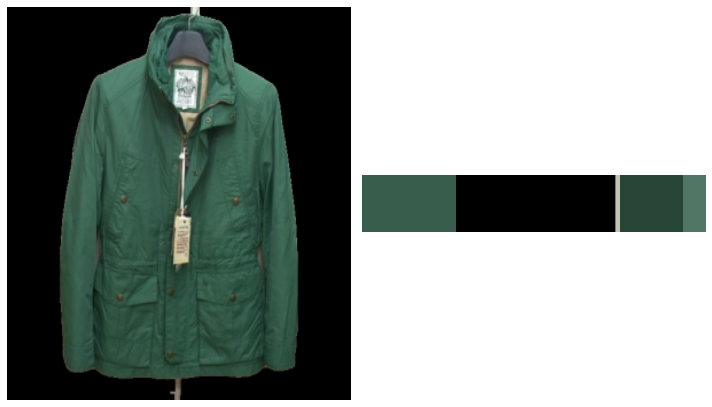

{0: 0.66, 1: 0.18, 2: 0.02, 3: 0.14, 4: 0.0}
[[4.48298678e-02 4.58901435e-02 5.40198280e-02]
 [2.91975977e+01 3.26073452e+01 4.58135476e+01]
 [5.40686626e+01 5.61230809e+01 6.88430570e+01]
 [2.06399937e+01 2.30640335e+01 3.27149114e+01]
 [2.05465887e+02 2.02444444e+02 1.97824561e+02]]


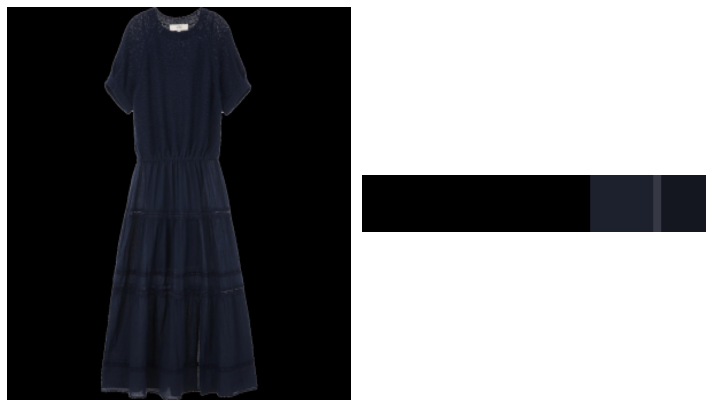

In [17]:
from collections import Counter
 
def palette_perc(k_cluster):
    width = 300
    palette = np.zeros((50, width, 3), np.uint8)
    
    n_pixels = len(k_cluster.labels_)
    counter = Counter(k_cluster.labels_) # count how many pixels per cluster
    perc = {}
    for i in counter:
        perc[i] = np.round(counter[i]/n_pixels, 2)
    perc = dict(sorted(perc.items()))
    
    #for logging purposes
    print(perc)
    print(k_cluster.cluster_centers_)
    
    step = 0
    
    for idx, centers in enumerate(k_cluster.cluster_centers_): 
        palette[:, step:int(step + perc[idx]*width+1), :] = centers
        step += int(perc[idx]*width+1)
        
    return palette
    
clt_1 = clt.fit(img.reshape(-1, 3))
show_img_compar(img, palette_perc(clt_1))
 
clt_2 = clt.fit(img_2.reshape(-1, 3))
show_img_compar(img_2, palette_perc(clt_2))


## 다른방법

In [ ]:
rgb = [{'R': result[0], 'G': result[1], 'B': result[2]}]